## Predicting Grades to Tailor Support for Academic Success

**DATA 144**

**By:** Kathryn Nguyen, Ethan Aoki, Mackenzie Cramer, David Kim, and Anjika Morari

Studies show that demographic variables (such as parent education, parental support, socio-economic factors, etc.) have a strong correlation with student success. I aim to develop a predictive model that uses machine learning algorithms to predict student grades based on their various background demographic features.



**Dataset**


---


**Belongs to:** The UCI Machine Learning Repository

**Created by:** Paulo Cortez

**Dataset Title:** Student Performance

This dataset aims to gage student achievement in secondary education of two Portuguese schools and was collected by using school reports and questionnaires. We used the Portuguese dataset to analyze student performance in the Portuguese language class.
In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks.

**Notes:** the target attribute G3 has a strong correlation with attributes G2 and G1 because G3 is the final year grade while G1 and G2 correspond to the 1st and 2nd period grades.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# data: https://archive.ics.uci.edu/dataset/320/student+performance

df = pd.read_csv("student-por.csv", delimiter=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


**Setting up the train and test sets**


---

In [ ]:
from sklearn.model_selection import train_test_split
df_train = df
df_lin = df_train

train_mon = pd.get_dummies(df_lin.drop(['G1', 'G2', 'G3'], axis = 1).fillna(0))
X_train, X_test, y_train, y_test = train_test_split(train_mon, df_lin['G3'], test_size=0.2, random_state=0)

**Linear Regression**


---

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
prediction = lin_reg_model.predict(X_test)

lin_reg_rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('Linear Regression RMSE: ' + str(lin_reg_rmse))

Linear Regression RMSE: 2.394745248916374


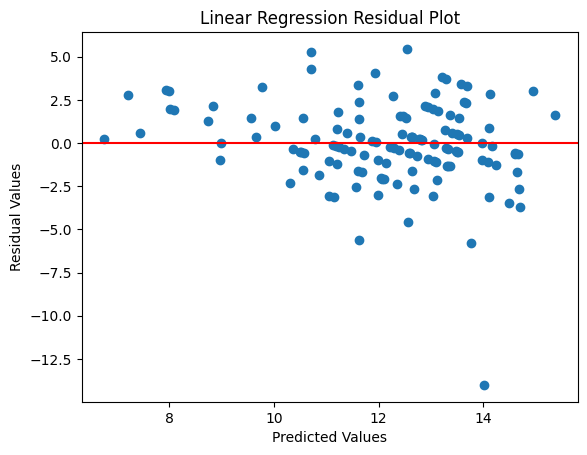

In [ ]:
plt.scatter(prediction, y_test - prediction)
plt.axhline(y = 0, color = 'r')
plt.title('Linear Regression Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.show()

**Polynomial Regression**


---

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df_train = df
df_lin = df_train

poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(X_train.loc[:, ['studytime']])
x_test_trans = poly.transform(X_test.loc[:, ['studytime']])

lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred_poly = lr.predict(x_test_trans)

lin_reg_rmsepoly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print('Polynomial Regression w/ Degree 3 RMSE: ' + str(lin_reg_rmsepoly))

Polynomial Regression w/ Degree 3 RMSE: 2.518353462142373


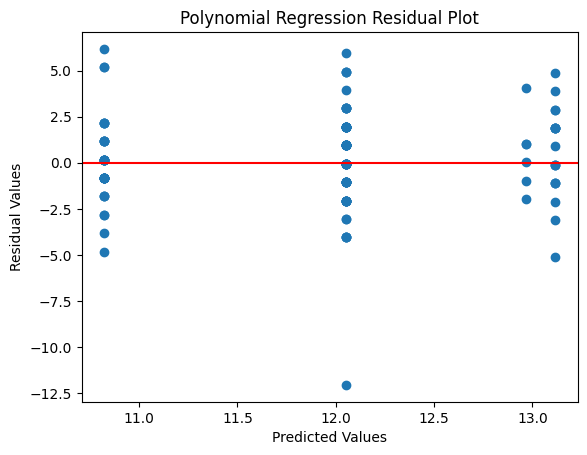

In [ ]:
plt.scatter(y_pred_poly, y_test - y_pred_poly)
plt.axhline(y = 0, color = 'r')
plt.title('Polynomial Regression Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.show()

**Neural Network**


---



In [ ]:
from sklearn.neural_network import MLPClassifier  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(70,40),
                    activation='relu',      #Default activation is 'relu'. Also check 'identity','logistic'
                    max_iter=100,           #Default max_iter is 200
                    solver='sgd',           #Default solver is 'adam'. Also, check 'lbfgs'.
                    verbose=1,              #Default verbose is False
                    random_state=42)        #Default n_iter_no_change=10


clf.fit(X_train, y_train)

print('Accuracy on training set:')
nn_y_pred_train=clf.predict(X_train)
print(accuracy_score(y_train, nn_y_pred_train))

print('Accuracy on test set:')
nn_y_pred_test=clf.predict(X_test)
print(accuracy_score(y_test,nn_y_pred_test))

Iteration 1, loss = 4.38652399
Iteration 2, loss = 3.35219498
Iteration 3, loss = 2.97933362
Iteration 4, loss = 2.84980400
Iteration 5, loss = 2.76198984
Iteration 6, loss = 2.70864277
Iteration 7, loss = 2.66365769
Iteration 8, loss = 2.62499420
Iteration 9, loss = 2.59236906
Iteration 10, loss = 2.56376935
Iteration 11, loss = 2.53930324
Iteration 12, loss = 2.51926595
Iteration 13, loss = 2.50461238
Iteration 14, loss = 2.49479662
Iteration 15, loss = 2.48616729
Iteration 16, loss = 2.47956228
Iteration 17, loss = 2.47241149
Iteration 18, loss = 2.46741904
Iteration 19, loss = 2.46239076
Iteration 20, loss = 2.45840556
Iteration 21, loss = 2.45357667
Iteration 22, loss = 2.44989905
Iteration 23, loss = 2.44562992
Iteration 24, loss = 2.44185979
Iteration 25, loss = 2.43873170
Iteration 26, loss = 2.43567153
Iteration 27, loss = 2.43300261
Iteration 28, loss = 2.43027422
Iteration 29, loss = 2.42697201
Iteration 30, loss = 2.42525929
Iteration 31, loss = 2.42295599
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
neural_net_rmse = np.sqrt(mean_squared_error(y_test, nn_y_pred_test))
print('Neural Network RMSE: ' + str(neural_net_rmse))

Neural Network RMSE: 2.9246959079272075


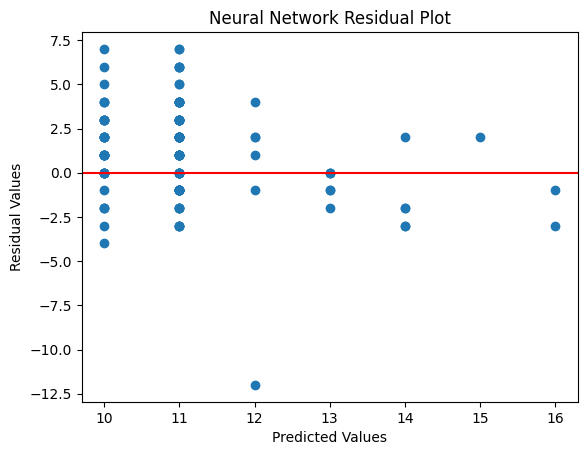

In [ ]:
plt.scatter(nn_y_pred_test, y_test - nn_y_pred_test)
plt.axhline(y = 0, color = 'r')
plt.title('Neural Network Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.show()

**Random Forest**


---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
r2 = r2_score(y_test, rf_y_pred)

print('Random Forest RMSE: ' + str(rmse))

Random Forest RMSE: 2.415434663861686


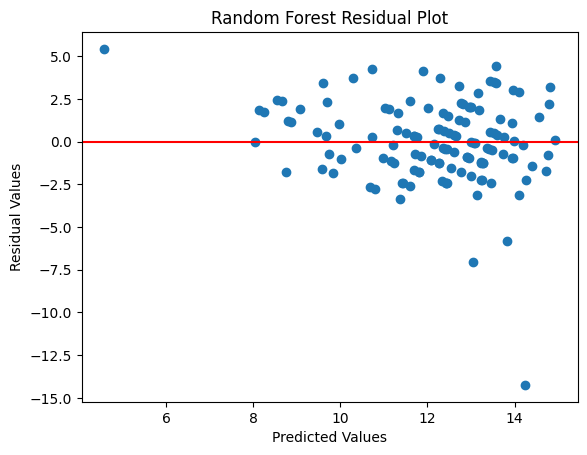

In [ ]:
plt.scatter(rf_y_pred, y_test - rf_y_pred)
plt.axhline(y = 0, color = 'r')
plt.title('Random Forest Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.show()

**Random Forest Feature Importance Visualization**


---



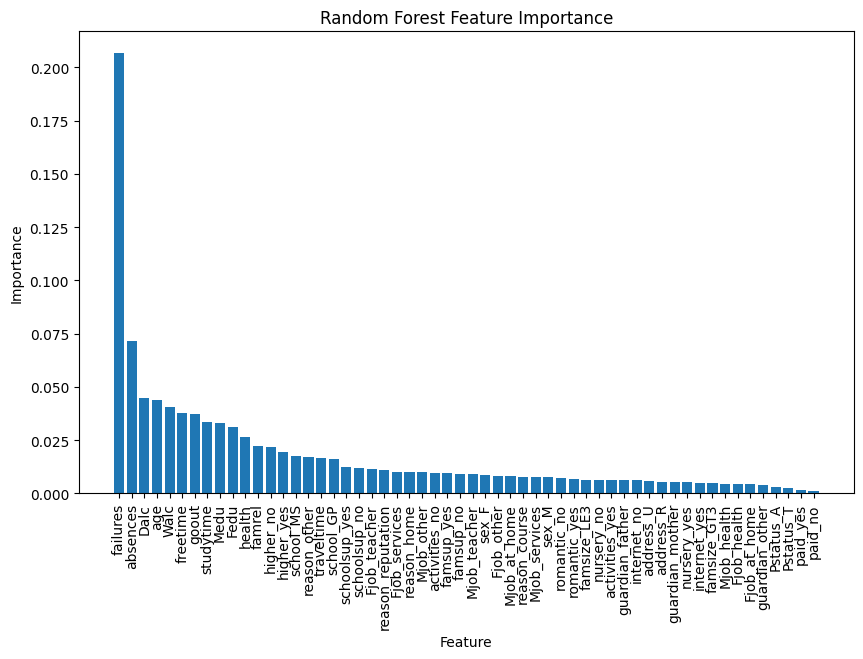

In [ ]:
feature_importances = rf_model.feature_importances_

feature_names = X_train.columns

indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

**Ensemble Methods**


---



In [ ]:
en_avg = (nn_y_pred_test + rf_y_pred + prediction + y_pred_poly) / 4
ensemble_rmse = np.sqrt(mean_squared_error(y_test, en_avg))
print(ensemble_rmse)
print(prediction)
print(rf_y_pred)
print(nn_y_pred_test)
print(y_pred_poly)
print(y_test)
print(en_avg)

2.339564455700143
[11.13923645 14.1120224  13.08036804 11.6008606   8.00971222 11.87730408
 14.08716583 14.13323212 11.6444931  12.38711548 11.23397064 11.05000305
 12.79418945 13.77076721 14.96008301 13.33296204 13.29219818 14.25432587
 10.49219513 10.36231232 12.22090149 12.10361481 15.37549591 13.04125977
 14.17355347 14.012146   13.052742   12.52271271 12.95142365 11.98399353
 12.64518738 10.71453094 11.23097992 11.93457031 12.73135376 10.50981903
  9.65707397 13.11636353 12.80496979 12.05310059 12.93597412 12.54894257
 11.19132233 13.47212982 11.61675262 10.56460571 13.41304779 10.85838318
 11.33313751 12.67655945  7.44696808 13.29225922 11.56479645 12.45733643
  8.96220398  8.8310318  13.30413055 10.55316162 13.54401398 12.28205109
 14.64954376  6.75370789 12.30451202  8.73013306 13.08943939 13.35814667
 14.7088089  12.83898163 11.62524414 12.56829834  8.98763275 11.71968842
 12.63454437 14.484375   12.45885468 12.62929535 13.49505615 13.51222992
 13.32366943 13.5035553  13.97971

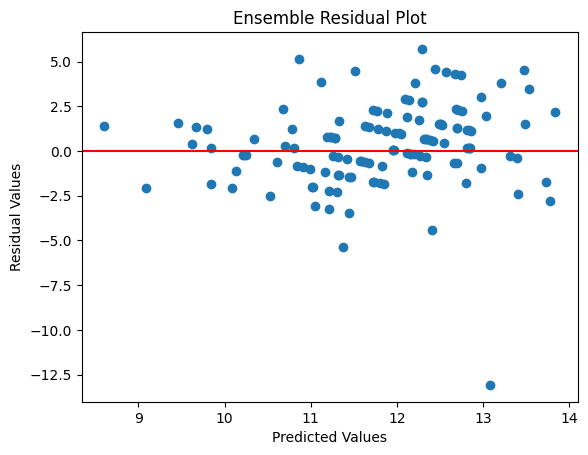

In [ ]:
plt.scatter(en_avg, y_test - en_avg)
plt.axhline(y = 0, color = 'r')
plt.title('Ensemble Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.show()

**Concluding Remarks**


---

The inclusion of G1 improved our prediction accuracy from an RMSE of 2.34 to 1.58. Understanding the importance of students’ initial stages in school can encourage educators to prevent academic setbacks, emphasizing a greater focus on making sure students start strong rather than last-ditch efforts.



**Resources**


---

Okapala, C. O. (2002). Educational resources, student demographics and achievement scores. J. Educ. Financ. 27, 885–908. Available online at: http://www.jstor.org/stable/40704151

Morgan, P. L., Farkas, G., Hillemeier, M. M., and Maczuga, S. (2009). Risk factors for learning-related behavior problems at 24 months of age: population-based estimates. J. Abnorm. Child Psychol. 37, 401–413. doi: 10.1007/s10802-008-9279-8


